In [9]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as T

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

import timeit
import json
import cv2, random

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image
    
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [4]:
Joints = json.load(open("Dataset/annotation.json","r"))
names = Joints.keys()

In [12]:
import show

Joints = json.load(open("Dataset/annotation.json","r"))
names = Joints.keys()
random.shuffle(names)
LeftJoints = {}
RightJoints = {}
print(len(names))

94126


In [14]:
random.sample(range(0, 94126), num)

[62802, 82100]

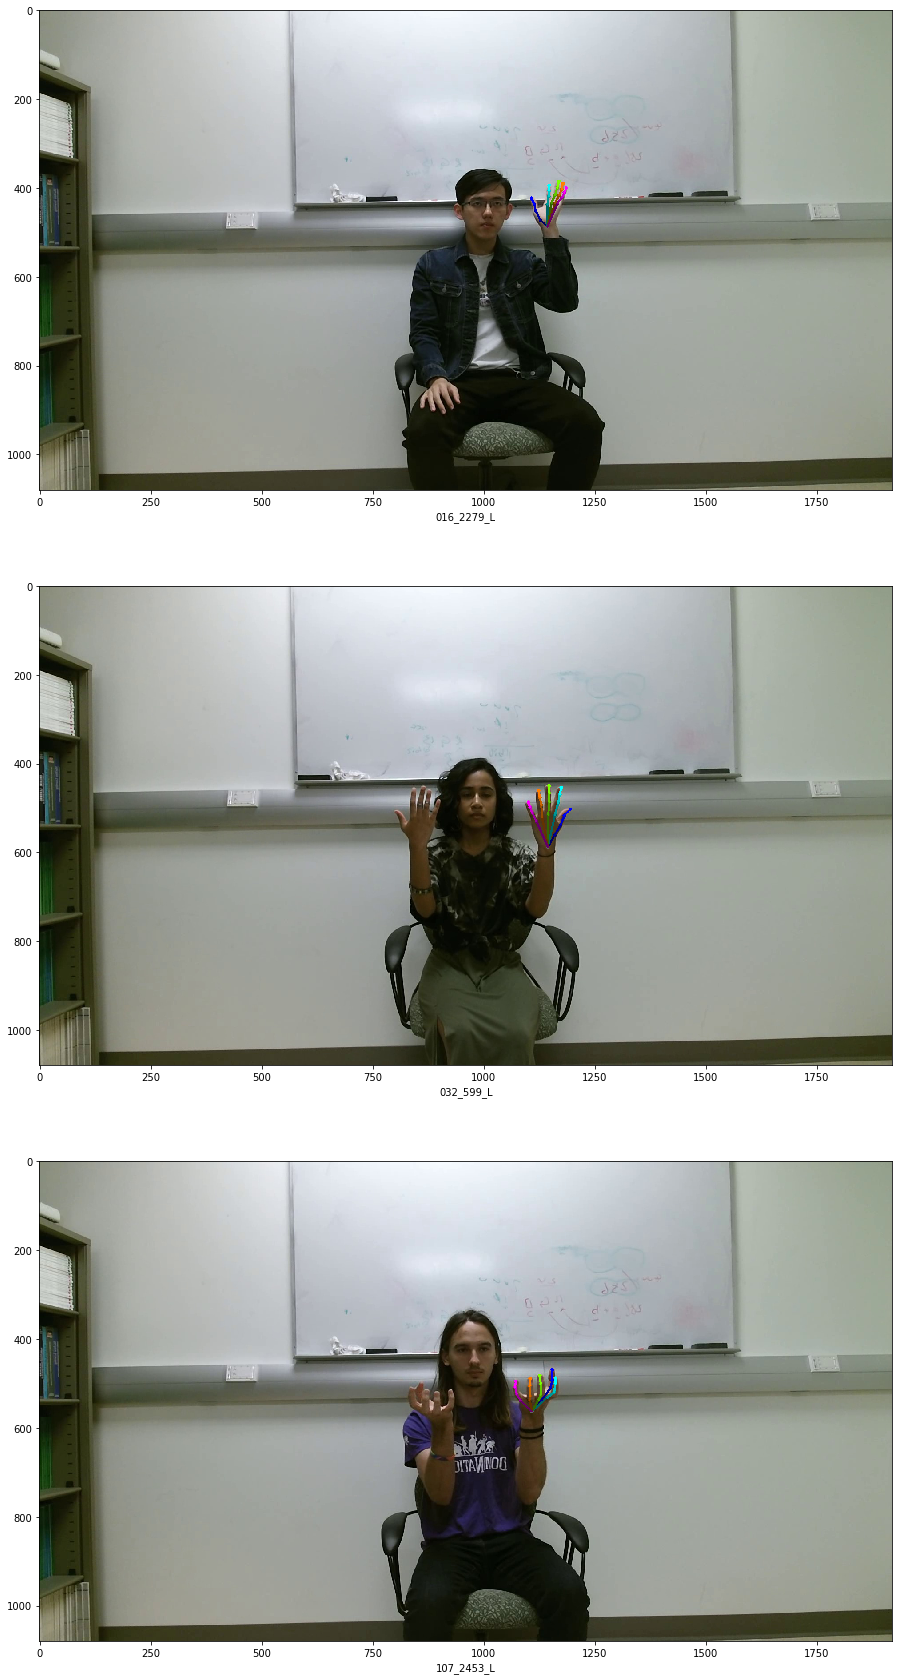

In [18]:
num = 3
fix, ax = plt.subplots(num, 1, figsize=(20,num*10))
for j, k in enumerate(random.sample(range(0, 94126), num)):
    canvas = cv2.imread("Dataset/Images/" + names[k][:-2] + ".jpg")
    tmp = []
    for i in xrange(len(Joints[names[k]])):
        tmp.append([int(Joints[names[k]][i][0]), int(Joints[names[k]][i][1])])
    canvas = show.draw_hand(canvas, tmp)
    ax[j].set_xlabel(names[k])
    ax[j].imshow(canvas[:,:,::-1])

In [ ]:
from cs175utils.features import color_histogram_hsv, hog_feature

def load_data(num_training=1000, num_validation=100, num_test=10):
    pass
    
X_train, y_train, X_val, y_val, X_test, y_test = load_data()